In [24]:
import pandas as pd
import numpy as np

# import models here 
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#setting up random seed for project requirements 
np.random.seed(73)


In [25]:
#reading in final dataset from EDA 
df = pd.read_csv('../data/stock_percentage_difference.csv')

In [26]:
df.columns

Index(['Unnamed: 0', 'level_0', 'transaction_date', 'ticker',
       'asset_description', 'type', 'amount', 'representative', 'timestamp',
       'merge_key', 'people', 'state', 'party_x', 'total_senate_years',
       'total_house_years', 'total_years', 'donation_merge_key', 'name',
       'total_raised', 'total_from_small_donors', 'percent_from_small_donors*',
       'total_money_raised', 'party_y', 'start', 'day_30',
       'day_30_stock_perc_diff', 'day_60', 'day_60_stock_perc_diff', 'day_90',
       'day_90_stock_perc_diff', 'day_180', 'day_180_stock_perc_diff',
       'sp_start', 'sp_30', 'sp_30_sp_perc_diff', 'sp_60',
       'sp_60_sp_perc_diff', 'sp_90', 'sp_90_sp_perc_diff', 'sp_180',
       'sp_180_sp_perc_diff'],
      dtype='object')

In [27]:
df['total_raised'] =[int(raised.replace('$','')) for raised in df['total_raised']]

In [28]:
df['percent_from_small_donors*'] = [float(pct.replace('%','')) for pct in df['percent_from_small_donors*']]

In [29]:
df['percent_from_small_donors*']

0         6.00
1         6.00
2         6.00
3         6.00
4         6.00
         ...  
10076    19.55
10077    19.55
10078    19.55
10079    19.55
10080    19.55
Name: percent_from_small_donors*, Length: 10081, dtype: float64

In [30]:
df['type'].value_counts()

purchase        5101
sale_full       2804
sale_partial    2088
exchange          88
Name: type, dtype: int64

In [31]:
beats_sp = []
for i, row in df.iterrows():
    if row['day_180_stock_perc_diff'] > row['sp_180_sp_perc_diff']:
        beats_sp.append(1)
    else:
        beats_sp.append(0)
df['beats_sp'] = beats_sp

In [32]:
df = df.loc[df['type'] == 'purchase']

In [33]:
df['beats_sp'].mean()

0.46324250147029994

In [67]:
df.columns

Index(['Unnamed: 0', 'level_0', 'transaction_date', 'ticker',
       'asset_description', 'type', 'amount', 'representative', 'timestamp',
       'merge_key', 'people', 'state', 'party_x', 'total_senate_years',
       'total_house_years', 'total_years', 'donation_merge_key', 'name',
       'total_raised', 'total_from_small_donors', 'percent_from_small_donors*',
       'total_money_raised', 'party_y', 'start', 'day_30',
       'day_30_stock_perc_diff', 'day_60', 'day_60_stock_perc_diff', 'day_90',
       'day_90_stock_perc_diff', 'day_180', 'day_180_stock_perc_diff',
       'sp_start', 'sp_30', 'sp_30_sp_perc_diff', 'sp_60',
       'sp_60_sp_perc_diff', 'sp_90', 'sp_90_sp_perc_diff', 'sp_180',
       'sp_180_sp_perc_diff', 'beats_sp'],
      dtype='object')

In [68]:
Features = ['party_x', 'total_years', 'total_raised', 'percent_from_small_donors*']
X = df[Features]
y = df['beats_sp']

X = pd.get_dummies(X, columns = ['party_x'], drop_first = True)

In [69]:
X['total_raised'].unique()

array([  4748019,   5695157,   2182985,    352725,   1813365,   1534882,
         1092609,   1336576,    874311,    678648,    736116,    540712,
         -561303,   2328616,    847320,   3384490,   4370133,    410261,
         1755555,   6128177,    658295,   1008847,   2018692,   4794213,
         1194960,   1024912,   1729482,   2338195,   1166754,   7694027,
         1405738,    791888,    103492,   1094104,   9962507,   1858388,
         1161738,   1228970,   1202509,  27359508,    964731,    942386,
         1632262,    655365,   3321170,    759908,   6419707,  10430712,
        19427865,   1788706,    884651,   2549667,   1580952,    129584,
         1630498,   2105736,    977784,    454043,   2944893,    821745,
         6609476,    192137,   3842907,   3616380,    869210,   5968858,
         4975192,   1001120,    934102,   4437791,  12071622,  71351350,
        28093267,   6452506,  11304150,   5749615,  92135745, 102253913,
         7024927,  10472845,   6598997,   4020075, 

In [70]:
X.isna().sum()

total_years                   0
total_raised                  0
percent_from_small_donors*    0
party_x_Independent           0
party_x_Libertarian           0
party_x_Republican            0
dtype: int64

In [71]:
# train test splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [72]:
pipe = Pipeline([
    ('logreg', LogisticRegression())
])

params = {'logreg__C':[0, .1, 1], 
         'logreg__solver': ['saga'],
         'logreg__penalty': ['l1', 'l2']}


gs = GridSearchCV(pipe, params, cv = 5, verbose = 1)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=Pipeline(steps=[('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0, 0.1, 1],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['saga']},
             verbose=1)

In [73]:
gs.best_score_

0.5369934640522875

In [74]:
gs.best_params_

{'logreg__C': 0.1, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}

In [75]:
#checking variance and bias

print('Training Score:', gs.score(X_train, y_train))
print('Testing Score:', gs.score(X_test, y_test))

Training Score: 0.5369934640522875
Testing Score: 0.5384012539184952


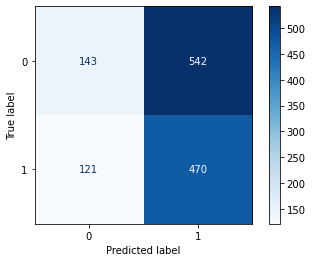

In [76]:
plot_confusion_matrix(gs, X_test_sc, y_test, cmap='Blues', 
                      values_format='d');